In [84]:
import seaborn as sns
import datetime as dt
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [85]:
plt.style.use('ggplot')

In [86]:
df = pd.read_csv('fruit_data_with_colors.txt', sep='\t')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.3+ KB


In [88]:
fruit = {1:'apple', 2:'mandarin', 3:'orange', 4:'lemon'}

In [89]:
# Assign features to x
X = df.loc[:, ['mass', 'width', 'height', 'color_score']]

In [90]:
# Assign label to y
y = df.loc[:, 'fruit_label']

#### KNN classifier problem code for X, y

c:\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


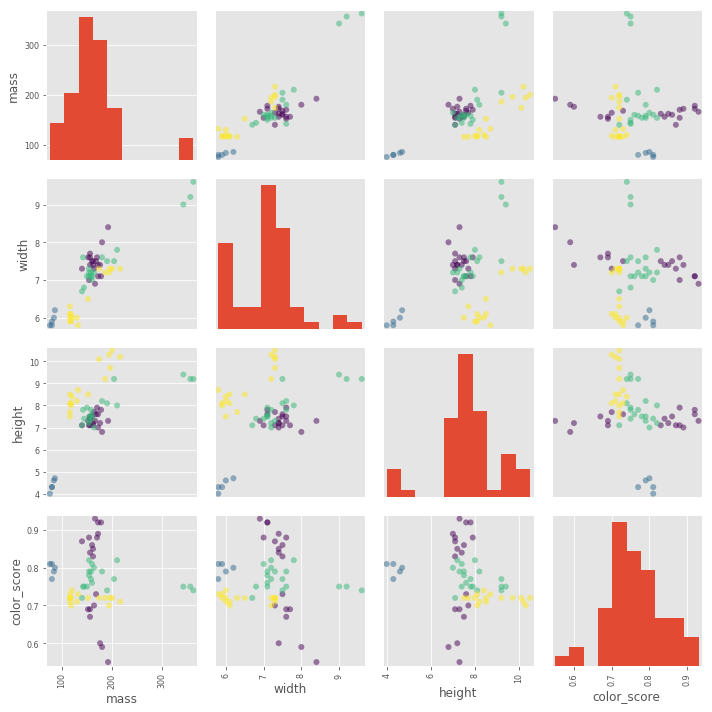

In [91]:
# Scatter matrix plot colored by label

fig, ax = plt.subplots(figsize=(10, 10))
pd.plotting.scatter_matrix(X, c=y, ax=ax, grid=True, marker='O')

fig.tight_layout()

In [92]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, stratify=y)

# Rescale axis

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
# Specify K neighbors

knn = KNeighborsClassifier()

In [94]:
# Fit training data in KNN classfier model

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [95]:
# Predict

prediction = knn.predict(X_test)

In [96]:
# Check predicted score
print("Training dataset: ", knn.score(X_train, y_train))
print("Test dataset: ", knn.score(X_test, y_test))

Training dataset:  1.0
Test dataset:  0.9333333333333333


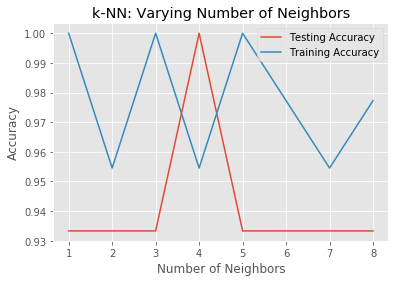

In [99]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
# Confusion matrix

confusion_matrix(y_test, prediction)

array([[5, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 4, 1],
       [0, 0, 0, 4]], dtype=int64)

In [18]:
# Classification report

classification_report(y_test, prediction)

'             precision    recall  f1-score   support\n\n          1       1.00      1.00      1.00         5\n          2       1.00      1.00      1.00         1\n          3       1.00      0.80      0.89         5\n          4       0.80      1.00      0.89         4\n\navg / total       0.95      0.93      0.93        15\n'